### 상호정보량
- 이 절에서는 상관계수를 대체할 수 있는 확률변수 특성인 상호정보량에 대해 공부한다.
- 상관관계의 정도를 거리로 나타내는 방법
- $MI[X,Y] = KL\big(p(x,y)||p(x)p(y)\big)
= \sum_{i=1}^{K} p(x_i,y_i) \log_2 \left(\dfrac{p(x_i,y_i)}{p(x_i)p(y_i)}\right)$
- $MI[X,Y] = H[X] - H[X|Y]$
- 값이 크게 나오면 상관관계가 크다

In [1]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

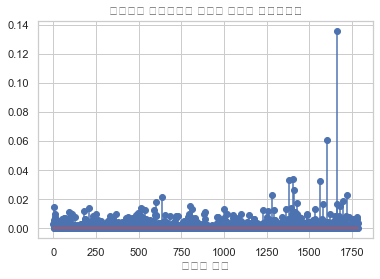

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

%matplotlib inline

categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
plt.stem(mi)
plt.title("뉴스그룹 카테고리와 키워드 사이의 상호정보량")
plt.xlabel("키워드 번호")
plt.show()

In [3]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

### 최대정보 상관계수(maximal information coefficient, MIC)

In [3]:
conda install minepy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - minepy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
from minepy import MINE

ModuleNotFoundError: No module named 'minepy'

In [5]:
mine = MINE()

n = 500

plt.figure(figsize=(8, 6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()

NameError: name 'MINE' is not defined